# Plot demo
This notebook contains some examples of the chainplot `Plot` class

In [1]:
from chainplot import Plot
from sklearn import datasets
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
# Load the data
iris = datasets.load_iris()
# print(iris['DESCR'])

In [3]:
iris_data = (
    pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width',
                                     'petal_length', 'petal_width'])
    .assign(group=iris.target)
    .assign(group_name=lambda df: df.group.replace({
                0: 'setosa', 1: 'versicolor', 2: 'virginica'
            }))
)

iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,group,group_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


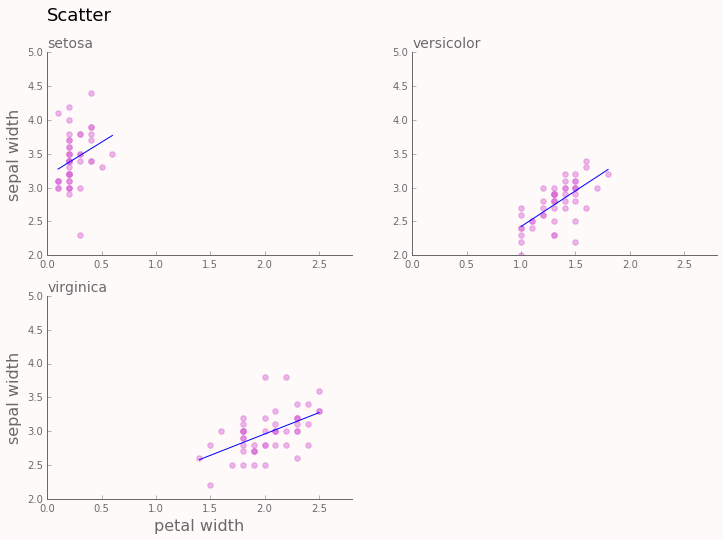

In [4]:
(iris_data
 .pipe(Plot, figsize=(12, 8))
 .aesthetics(x='petal_width', y='sepal_width', by='group_name')
 .points(s=30, alpha=0.5,
         edgecolour='orchid',
         colour='orchid')
 .trendline()
 .xlim((0, 2.8)).ylim((2, 5))
 .xlab('petal width').ylab('sepal width')
 .title('Scatter'))

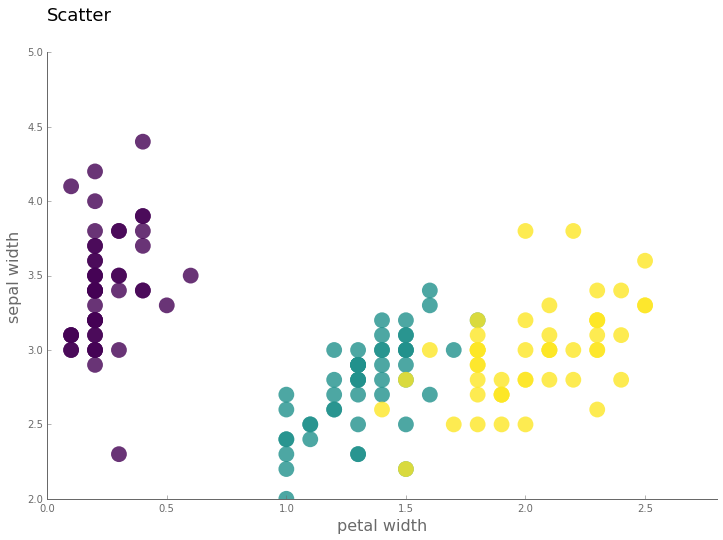

In [5]:
(iris_data
 .pipe(Plot, figsize=(12, 8))
 .aesthetics(x='petal_width',
             y='sepal_width',
             colour='group_name')
 .alter_style({
            'fig': {'background': {'color': 'white'}},
            'axes': {'background': {'color': 'white'}}
        })
 .points(s=250, alpha=0.8,
         edgecolour='None')
 .xlim((0, 2.8)).ylim((2, 5))
 .xlab('petal width').ylab('sepal width')
 .title('Scatter'))

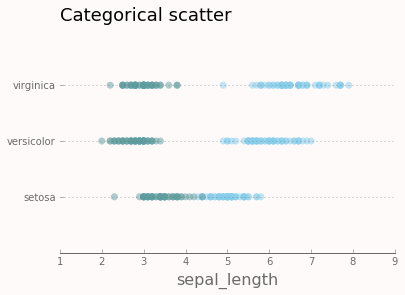

In [6]:
(iris_data
 .pipe(Plot)
 .aesthetics(x='sepal_length', y='group_name')
 .points(categorical='y',
         s=50, alpha=0.5,
         edgecolour='None',
         colour='skyblue')
 .aesthetics(x='sepal_width', y='group_name')
 .points(categorical='y',
         s=50, alpha=0.5,
         edgecolour='None',
         colour='cadetblue')
 .title('Categorical scatter'))

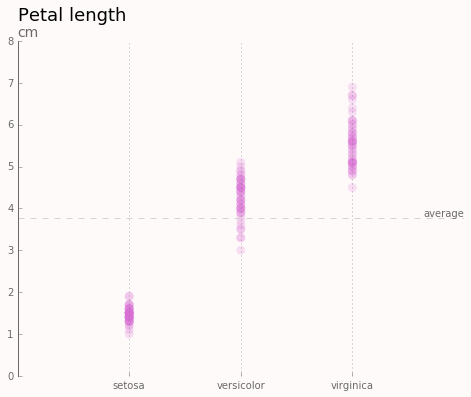

In [7]:
(iris_data
 .pipe(Plot, figsize=(8, 6))
 .aesthetics(x='group_name', y='petal_length')
 .points(categorical='x',
         s=80, alpha=0.2,
         edgecolour='None',
         colour='orchid')
 .hline(np.mean, annotation='average',
        colour='lightgray', linestyle='dashed')
 .ylab('')
 .title('Petal length')
 .subtitle('cm'))